In [14]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

In [4]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"

0.25


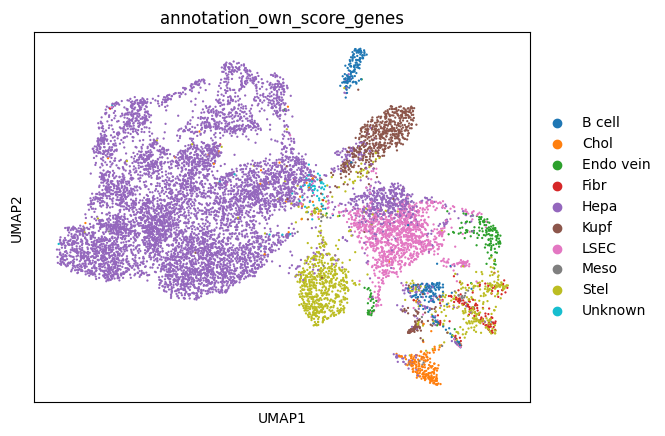

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.511578
Chol                         2.092982
Endo vein                    1.522978
Fibr                         1.077663
Hepa                        67.011044
Kupf                         5.976131
LSEC                        10.473815
Meso                         0.338440
Stel                         8.469897
Unknown                      0.525472


In [5]:
own_score_genes(sdata,path_mg,scale_score='MinMax')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

In [6]:
# Use scores that are not scaled for the clustering (and no min_score) or scores that are scaled
scores = own_score_genes(sdata,path_mg,min_score='None',scale_score='None') 
scores_minmax = own_score_genes(sdata,path_mg,min_score='None',scale_score='MinMax') 
print(scores)
scores_minmax

           Hepa      LSEC  Endo vein      Chol       Kupf       Stel  \
0      5.861590 -3.131287  -0.508547  0.405212  -2.110327  -4.238841   
1     -4.979709 -0.574773  -1.801248 -3.391202  30.376418  -5.598540   
2     -5.072861 -3.131287  -1.801248 -2.706567  -2.109787  -4.697687   
3     -3.231182 -3.131287  -1.801248 -1.828302  -4.039107  -4.638282   
4     -2.301904 -3.131287  -1.801248 -0.413894  -4.039107  -2.840678   
...         ...       ...        ...       ...        ...        ...   
11223 -0.235949 -3.131287  -1.801248 -0.842371  -4.039107  -2.552136   
11224  5.060102 -3.131287  -1.801248  0.092965   0.603503  -1.906806   
11225  0.858052 -3.131287  -1.801248 -0.873106   0.641340  -5.152612   
11226 -7.600515 -3.131287  -1.801248 -2.933600   1.619867  29.500845   
11227 -1.827229  5.923897   2.410719 -0.787590  53.721397  -3.803785   

            Fibr    B cell       Meso  
0      -3.227286 -0.493516  -0.397378  
1      25.943272 -0.493516  23.226124  
2      40.89746

,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.536893,0.000000,0.018476,0.068247,0.020264,0.032274,0.015266,0.0,0.000000
1,0.132184,0.045767,0.000000,0.000000,0.361570,0.009912,0.242203,0.0,0.392005
2,0.128706,0.000000,0.000000,0.012307,0.020269,0.024728,0.358542,0.0,0.685175
3,0.197457,0.000000,0.000000,0.028096,0.000000,0.025705,0.178748,0.0,0.237066
4,0.232147,0.000000,0.000000,0.053522,0.000000,0.055269,0.016683,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
11223,0.309270,0.000000,0.000000,0.045819,0.000000,0.060015,0.015148,0.0,0.000000
11224,0.506973,0.000000,0.000000,0.062634,0.048775,0.070629,0.021619,0.0,0.000000
11225,0.350109,0.000000,0.000000,0.045267,0.049173,0.017246,0.008158,0.0,0.000000
11226,0.034348,0.000000,0.000000,0.008226,0.059453,0.587182,0.184023,0.0,0.000000


In [7]:
KMeans_clustering(sdata,scores,N_clusters=12)
KMeans_clustering(sdata,scores_minmax,suffix_name='minmax',N_clusters=12)

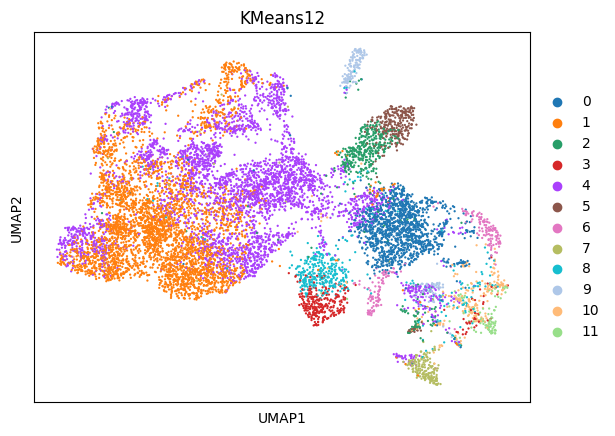

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
     KMeans12
0   11.889918
1   32.214108
2    4.070182
3    2.760955
4   33.808336
5    2.662985
6    1.897043
7    1.816886
8    3.990025
9    1.879230
10   2.075169
11   0.935162


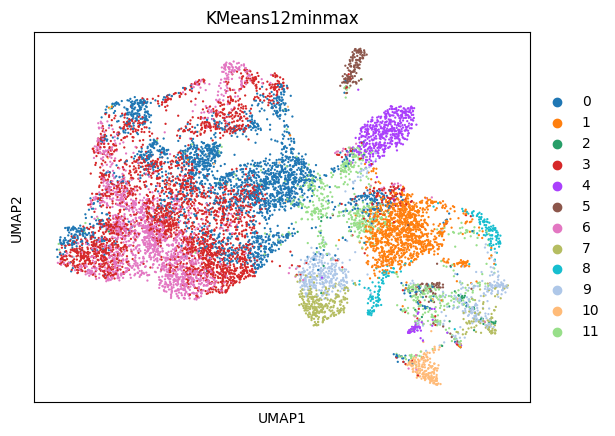

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
    KMeans12minmax
0        22.969362
1        10.384752
2         0.374065
3        26.184539
4         4.871749
5         1.710011
6        15.096188
7         3.099394
8         1.727823
9         5.032063
10        1.807980
11        6.742073


In [8]:
visualize_classification(sdata,'KMeans12','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
visualize_classification(sdata,'KMeans12minmax','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)


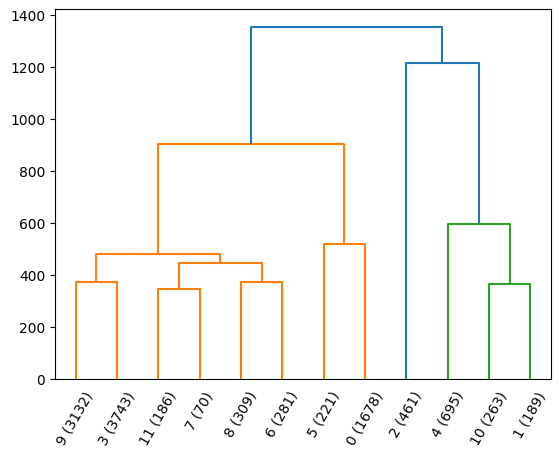

In [15]:
R = Hierarchical_clustering(sdata,scores,N_clusters=12)

In [ ]:
R['leaves']

[1216,
 7888,
 2637,
 1667,
 3608,
 1538,
 7244,
 1190,
 4311,
 4515,
 872,
 4875,
 10623,
 629,
 5715,
 4806,
 260,
 2590,
 1466,
 4812,
 3538,
 252,
 3187,
 2639,
 2610,
 2899,
 1454,
 3316,
 899,
 5180,
 7430,
 2185,
 3835,
 4686,
 1594,
 9065,
 8266,
 4902,
 11111,
 2469,
 7881,
 10687,
 8371,
 5434,
 5854,
 4051,
 5490,
 1118,
 3085,
 1417,
 1854,
 2018,
 5522,
 5805,
 3575,
 6557,
 2541,
 2644,
 827,
 993,
 1439,
 739,
 762,
 767,
 2855,
 3347,
 787,
 2642,
 2890,
 1657,
 3557,
 1893,
 2833,
 4731,
 8884,
 491,
 1520,
 6392,
 9670,
 1998,
 8251,
 3484,
 7477,
 3247,
 2136,
 7142,
 8027,
 2748,
 4425,
 8719,
 4748,
 1188,
 6686,
 1713,
 9276,
 2534,
 6216,
 3179,
 2043,
 5201,
 3149,
 9775,
 657,
 1052,
 5184,
 2315,
 6604,
 590,
 4459,
 585,
 9443,
 6581,
 3037,
 8526,
 3576,
 4476,
 2272,
 3565,
 3732,
 5401,
 1479,
 7869,
 11062,
 2438,
 9095,
 7766,
 10601,
 3765,
 9311,
 2152,
 926,
 4754,
 2309,
 2353,
 3175,
 9130,
 362,
 1757,
 1051,
 1102,
 10014,
 383,
 5384,
 1557,
 109

In [ ]:
R["ivl"] = list(dict.fromkeys(R["ivl"]))
R["ivl"]
# to np.array



['9', '3', '11', '7', '8', '6', '5', '0', '2', '4', '10', '1']

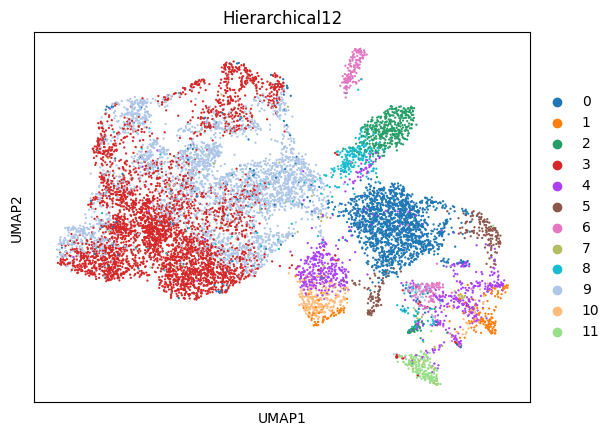

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
    Hierarchical12
0        14.944781
1         1.683292
2         4.105807
3        33.336302
4         6.189882
5         1.968294
6         2.502672
7         0.623441
8         2.752048
9        27.894549
10        2.342358
11        1.656573


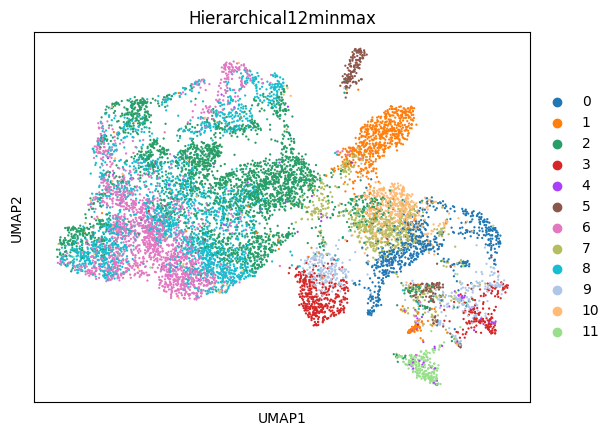

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
    Hierarchical12minmax
0               5.958318
1               6.252227
2              26.077663
3               4.845030
4               0.837193
5               2.235483
6              15.755255
7               6.457072
8              21.018881
9               3.740648
10              4.845030
11              1.977200


In [ ]:
visualize_classification(sdata,'Hierarchical12','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
visualize_classification(sdata,'Hierarchical12minmax','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

In [ ]:
R = Hierarchical_clustering(sdata,scores_minmax,suffix_name='minmax',N_clusters=12)

KeyError: 22425